# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [6]:
# checking the shape of the data
print(
    f"There are {data.shape[0]} rows and {data.shape[1]} columns."
)  # f-string

There are 340 rows and 15 columns.


In [9]:
# To view a sample of the data
data.sample(
    20, random_state=1
)  # setting the random_state ensures we get the same results every time

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


#### Observations
A quick glance at the above sample data suggests below patterns 
- There are quite a few Energy and Consumer Discretionary companies in the provided data set.
- Oil & Gas Exploration appears to be the most commonly occurring GICS sub industry. 
- Current Price appears to have a wide range. 
- Price Change has both positive and negative values which indicates there are stocks that've gone down in last 13 days.
- Volatility data appears to have a normal distribution. We'll analyse this more in EDA section.
- Net Cash Flow, Net Income and Earnings Per Share have both positive and negative values which indicates that there are companies running at loss. Same with P/B ratio.


In [10]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Observations
- Ticker Symbol, Security, GICS Sector and GICS Sub Industry are of type object. Rest are all numeric columns
- There seem to be no missing values in the data. 

In [18]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

In [12]:
# view top 5 rows of the data
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [13]:
# view last 5 rows of the data
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [14]:
# checking missing values in the data
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

#### Observations
There are no missing values in the dataset.

In [15]:
# checking for duplicate values in the data
df.duplicated().sum()

0

#### Observations
There are no duplicate values in the dataset.

In [19]:
# Lets convert the columns with an 'object' datatype into categorical variables
for column in df.columns:  # Loop through all columns in the dataframe
    if df[column].dtype == "object":  # Only apply for columns with type object
        df[column] = df[column].astype("category")  # convert to category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa

**Object columns have been successfully converted to category**

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,3M Company,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


#### Observations
- `Industrials` is the most commonly appearing GICS sector
- `Oil & Gas Exploration & Production` is the most commonly appearing GICS Sub Industry
- `Current Price`, `ROE` and `Cash Ratio` data appears to be right skewed. The mean is greater than the median (50%)
- `Price Change` appears to have a normal distribution. So is `Volatility` and `Earnings Per Share`. We shall check this more in following sections.
- `P/B Ratio` data appears to be left skewed. 
- Min and Max values in almost all numerical columns suggests there could be outliers in the data.

In [22]:
# Function to plot distribution plot and box plot as subplots in one row.
# This will be a resuable for univariate analysis of different variables of df dataframe


def distribution_box_plot(
    data, series, kde=False, mean=False, median=False, mode=False
):
    """
    Distplot and boxplot as subplots for a series within a dataframe
    data =  Dataframe
    series = column / variable under analysis
    kde =  Boolean. To show Kernel Density Estimate curve. Default set to False
    mean =  Boolean. To show mean value of a numeric series. Default set to False
    median = Boolean. To show median of a numeric series. Default set to False
    mode = Boolean. To show first mode value of a numeric series. Default set to False
    """
    plt.figure(figsize=(20, 5))
    plt.subplot(
        1, 2, 1
    )  # Divides the plot area into subplots with 1 row and 2 columns. 3rd arg indicates plot index
    sns.distplot(data[series], kde=kde)  # Add distribution plot
    if mean == True:  # Add mean indicator to the distplot
        plt.axvline(data[series].mean(), color="r", linestyle="--", label="Mean")
    if median == True:  # Add median indicator to the distplot
        plt.axvline(data[series].median(), color="g", linestyle="-", label="Median")
    if mode == True:  # Add first modal value indicator to the distplot
        plt.axvline(data[series].mode()[0], color="b", linestyle="-", label="Mode")

    plt.legend()  # Show legends

    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=data, y=series, showmeans=True
    )  # Add box plot with mean value indicator
    plt.show()

In [50]:
# Function to plot labelled countplot with percentage and count over the bars
# This will be a resuable for univariate analysis of different variables / columns within df dataframe


def labelled_countplot(data, series, showper=True, showcount=True, n=None):
    """
    data = Dataframe
    series = column / variable under analysis
    showper = Boolean. To show percentage over the bars.Default set to True
    showcount = Boolean. To show count over the bars.Default set to True
    n = number of top records to plot
    """
    count = data[series].nunique()  # get the number of unique values of the column
    if n is None:
        plt.figure(
            figsize=(count + 3.5, 7)
        )  # Adjust the width of the graph area as per the unique values
    else:
        plt.figure(
            figsize=(n + 5, 5)
        )  # Adjust the width of the graph area as per the n value specified

    # Show countplot of the data in descending order of value count
    ax = sns.countplot(
        x=data[series], order=data[series].value_counts(ascending=False).index[:n]
    )

    # If True, show count as data label over each bar
    if showcount == True:
        for p, label in zip(
            ax.patches, data[series].value_counts(ascending=False).values
        ):
            ax.annotate(label, (p.get_x() + 0.100, p.get_height() + 3.5))

    # If True, show percentage as data label over each bar
    if showper == True:
        total = data[series].count()
        for p, label in zip(
            ax.patches, 100 * data[series].value_counts(ascending=False).values / total
        ):
            ax.annotate(
                "({:.2f}%)".format(label), (p.get_x() + 0.350, p.get_height() + 3.5)
            )

    plt.xticks(rotation=90)
    plt.show()

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

**`Current Price`**

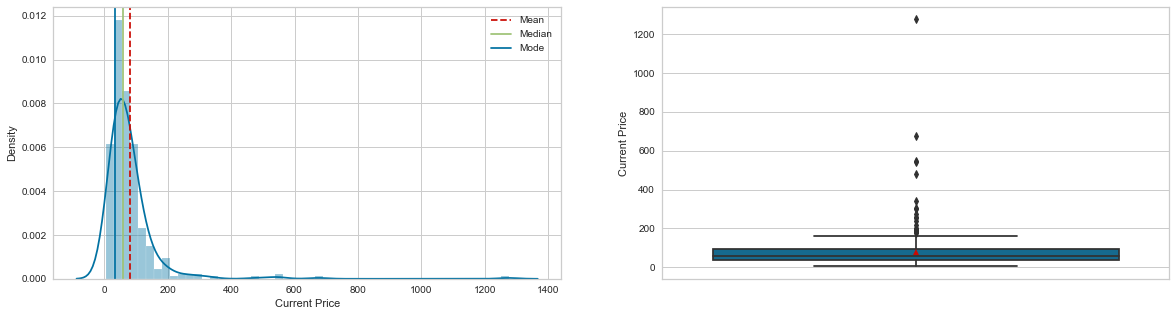

In [27]:
distribution_box_plot(
    df, "Current Price", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data is right skewed with quite a few outliers above the 3rd quartile.
- Stock prices are between 0 to 200 dollars for most of the companies, with few companies having price as high as 1400 dollars.

**`Price Change`**

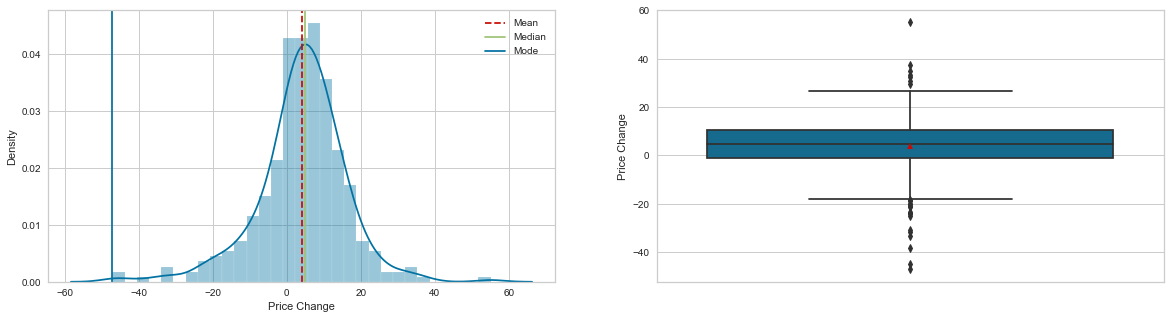

In [28]:
distribution_box_plot(
    df, "Price Change", kde=True, mean=True, median=True, mode=True
)

### Observations
- Price change data has a fairly normal distribution, with the change ranging from -60 to 60 dollars. 

**`Volatility`**

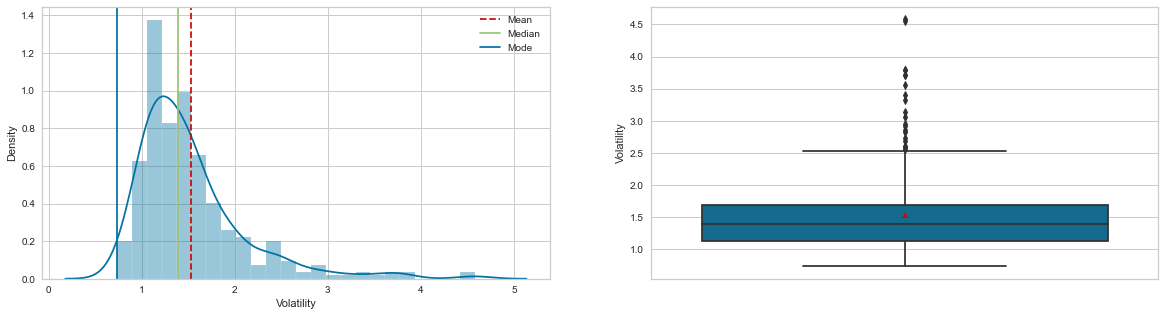

In [29]:
distribution_box_plot(
    df, "Volatility", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data is right skewed with a few outliers above the 3rd quartile.
- Most of the data is between 1 and 2.

**`ROE`**

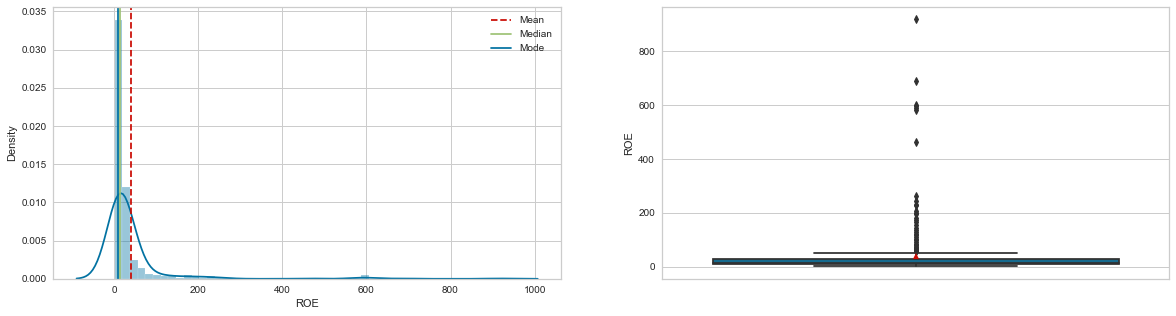

In [30]:
distribution_box_plot(
    df, "ROE", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data is heavily right skewed with lots of outliers above the 3rd quartile.

**`Cash Ratio`**

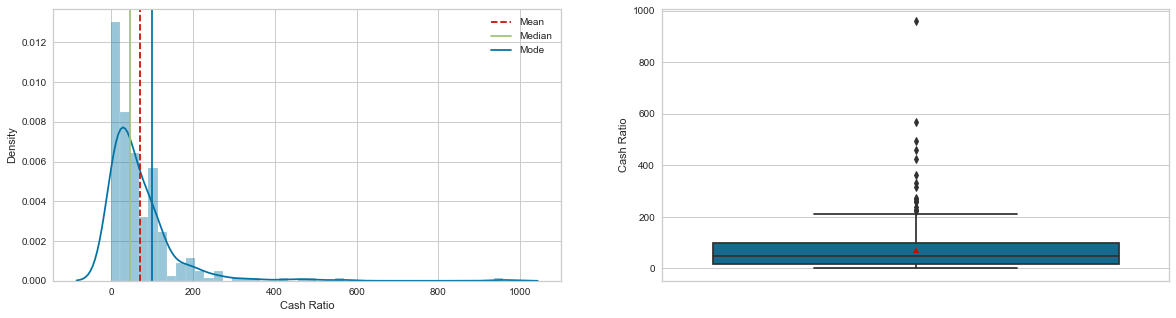

In [31]:
distribution_box_plot(
    df, "Cash Ratio", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data is right skewed with a few outliers above the 3rd quartile.

**`Net Cash Flow`**

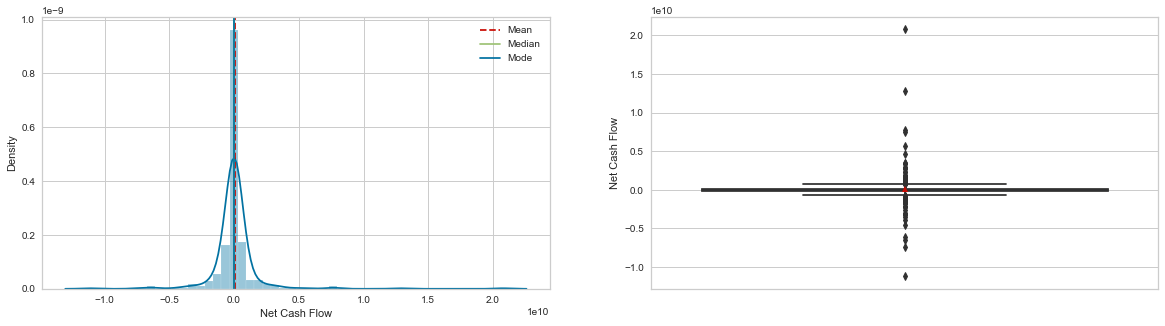

In [32]:
distribution_box_plot(
    df, "Net Cash Flow", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data has a normal distribution with outliers on both ends of the peak. 
- Net cash flow is 0 for most of the companies

**`Net Income`**

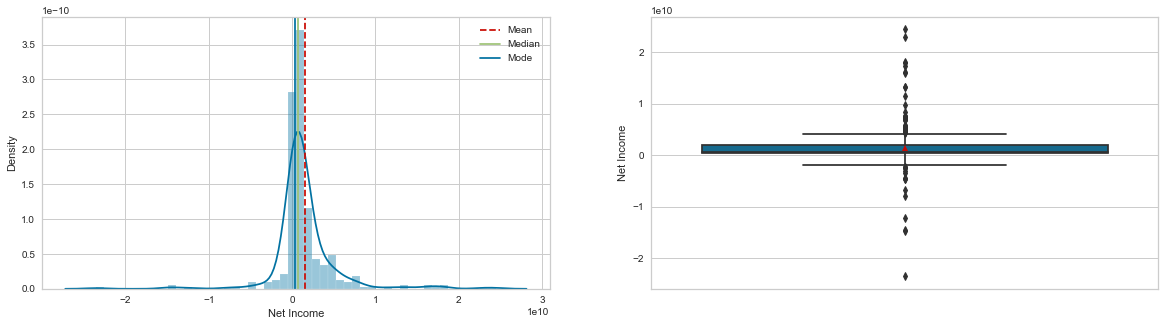

In [33]:
distribution_box_plot(
    df, "Net Income", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data has a near normal distribution with outliers on both ends of the peak. 
- Net income is between 0 and 1 for most of the companies

**`Earnings Per Share`**

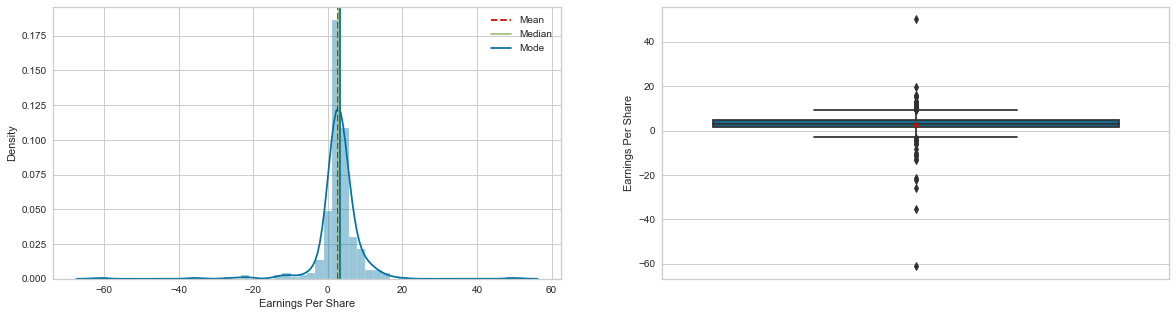

In [34]:
distribution_box_plot(
    df, "Earnings Per Share", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data has a near normal distribution with outliers on both ends of the peak. 
- Net income is between 0 and 1 for most of the companies

**`Estimated Shares Outstanding`**

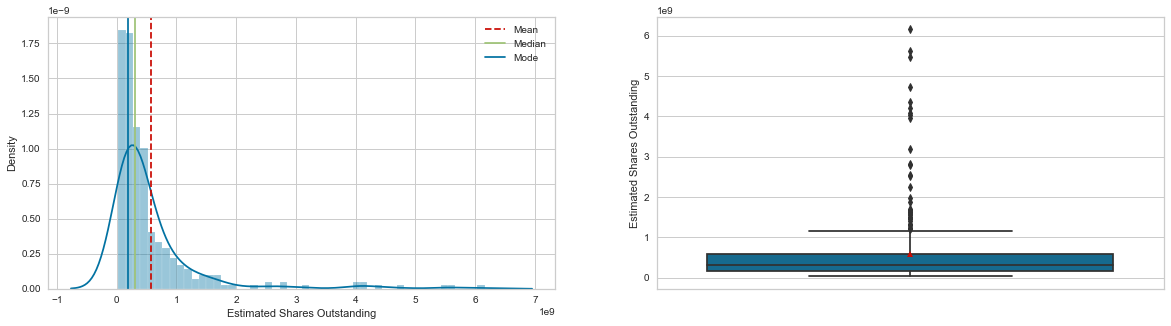

In [35]:
distribution_box_plot(
    df, "Estimated Shares Outstanding", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data is right skewed with a few outliers above the 3rd quartile.

**`P/E Ratio`**

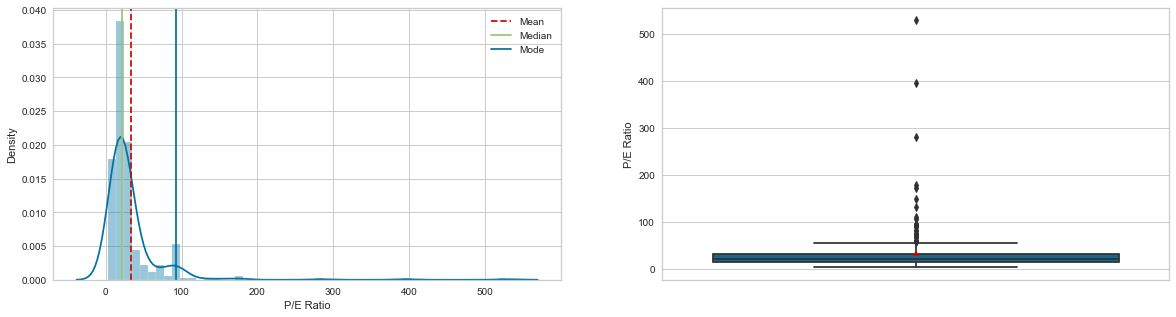

In [38]:
distribution_box_plot(
    df, "P/E Ratio", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data is right skewed with a few outliers above the 3rd quartile.

**`P/B Ratio`**

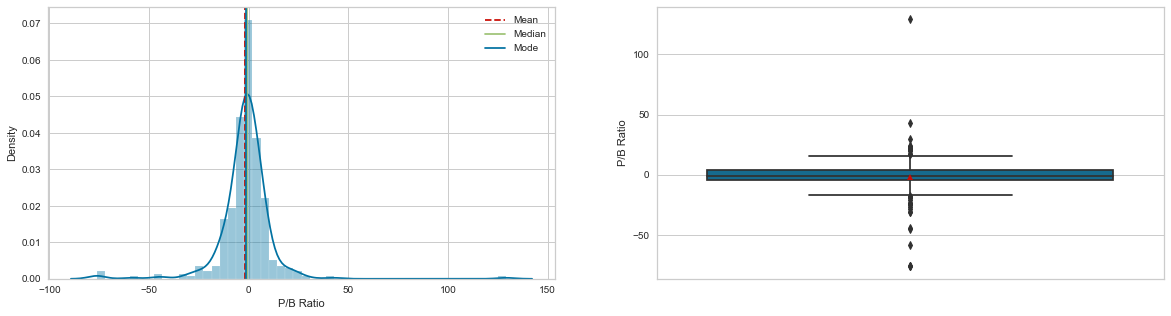

In [37]:
distribution_box_plot(
    df, "P/B Ratio", kde=True, mean=True, median=True, mode=True
)

### Observations
- The data has a near normal distribution with outliers on both ends of the peak. 
- Values are around 0 for most of the companies.

**`GICS Sector`**

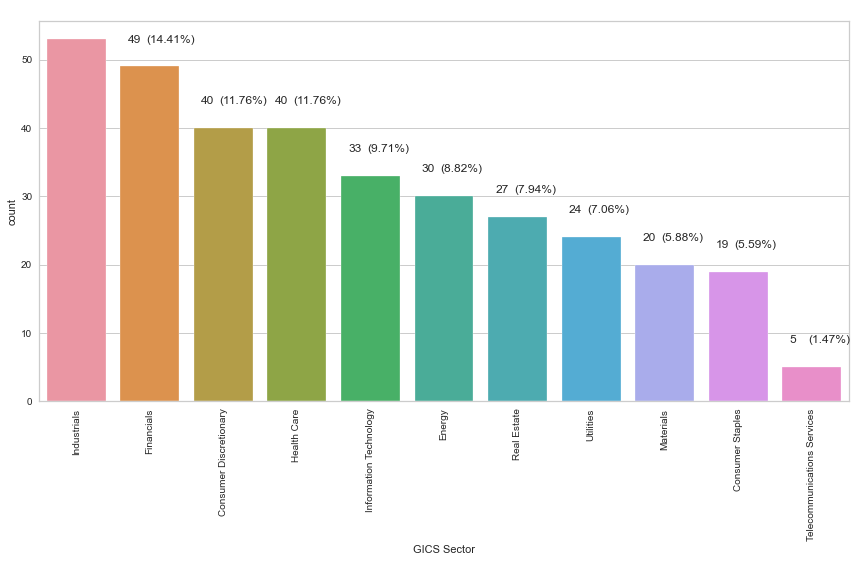

In [53]:
labelled_countplot(df, "GICS Sector", showper=True, showcount=True, n=None)

### Observations
- Industrials is the most frequently occurring GICS sector in the data, followed by Financials. 
- Consumer Discretion and Health Care has equal representation in the data set.

**`GICS Sub Industry`**

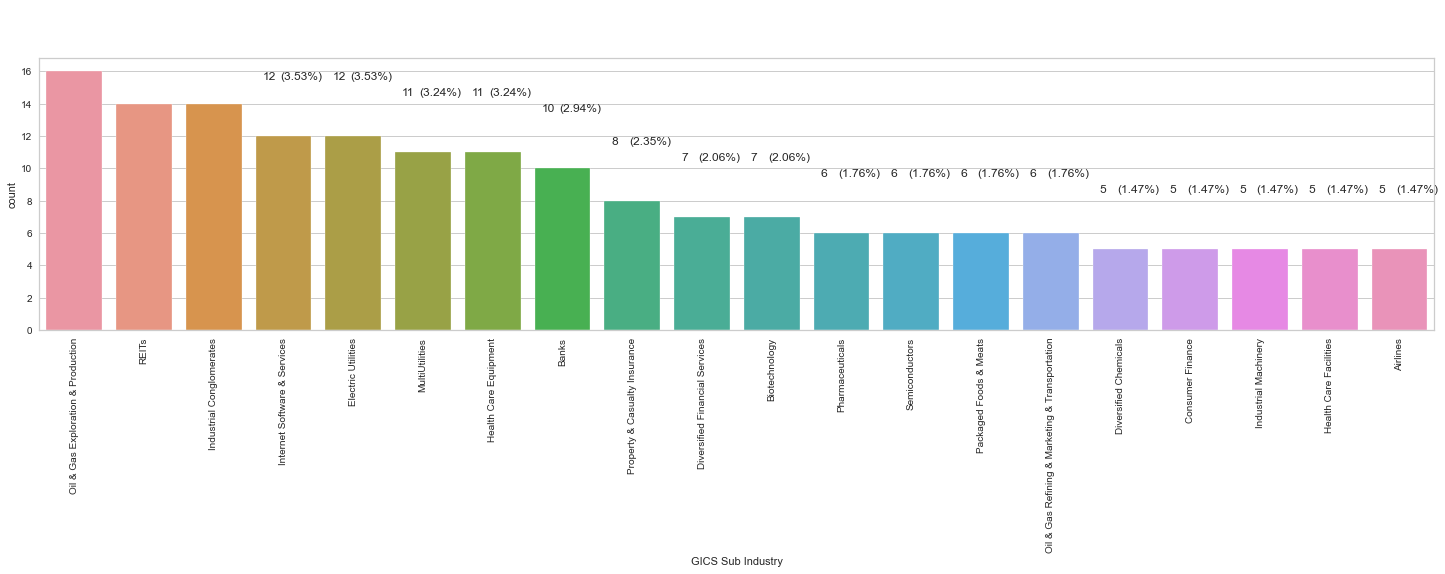

In [55]:
labelled_countplot(df, "GICS Sub Industry", showper=True, showcount=True, n=20)

### Observations
- Oil & Gas Exploration & Production is the most dominating GICS sub industry, followed by REITs.

## Bivariate analysis

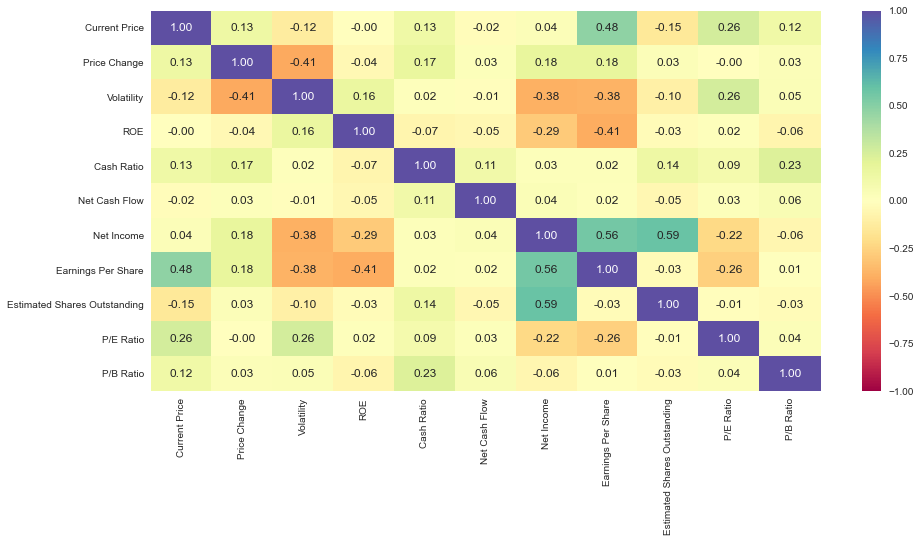

In [44]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Observations
- `Current Price` has a high positive correlation with `Earnings Per Share`, negative correlation with Earning shares outstanding and Volatality.
- `Price Change` has a high negative correlation with `Volatality`, which is obvious. 
- `Volatality` and `ROE` has a moderately high negative correlation with `Earnings per share` and `Net Income`
- `Cash Ratio` shows a very low correlation with all other variable. So is `Net Cash Flow`. 
- `Net Income` has a high positive correlation with `Estimated Shares Outstanding` and `Earnings Per Share`.
- `P/E Ratio` has a positive correlation with `Current Price` and `Volatality` , and a low negative correlation with `Earnings per share` and `Net Income`

**The stocks of which economic sector have seen the maximum price increase on average?**

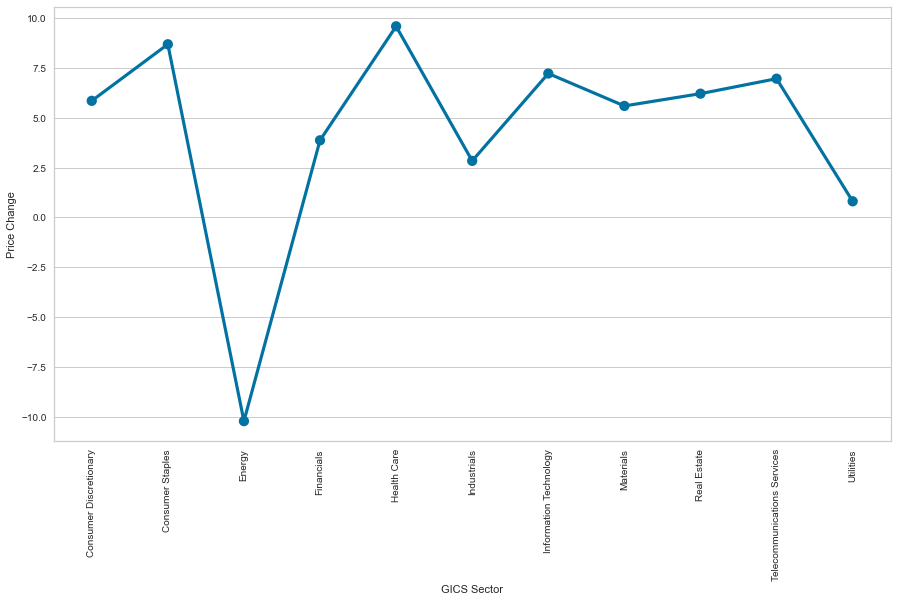

In [48]:
plt.figure(figsize=(15,8))
sns.pointplot(data=df, x="GICS Sector", y="Price Change", ci=False) 
plt.xticks(rotation=90)
plt.show()

### Observations
- On average, Health care has seen maximum price increase, whereas Energy has seen the maximum price drop.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

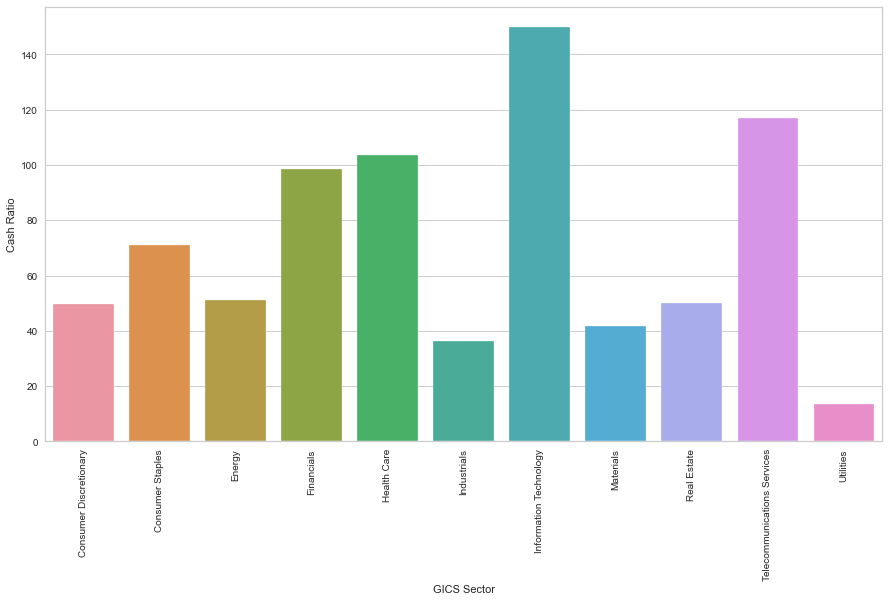

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=False) 
plt.xticks(rotation=90)
plt.show()

### Observations
The variation is quite huge across sectors, except between Financials and Healthcare, and Materials and Real Estate.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

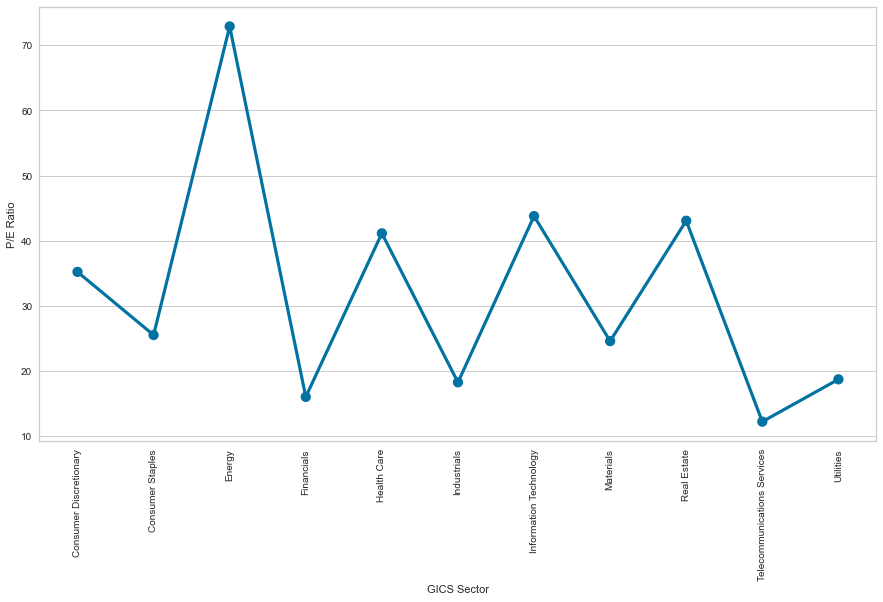

In [62]:
plt.figure(figsize=(15,8))
sns.pointplot(data=df, x="GICS Sector", y="P/E Ratio", ci=False) 
plt.xticks(rotation=90)
plt.show()

### Observations
- Energy sector has the highest P/E ratio, Utilities being the lowest.
- Health Care, Information Technology and Real Estate have almost same P/E ratio. 


**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

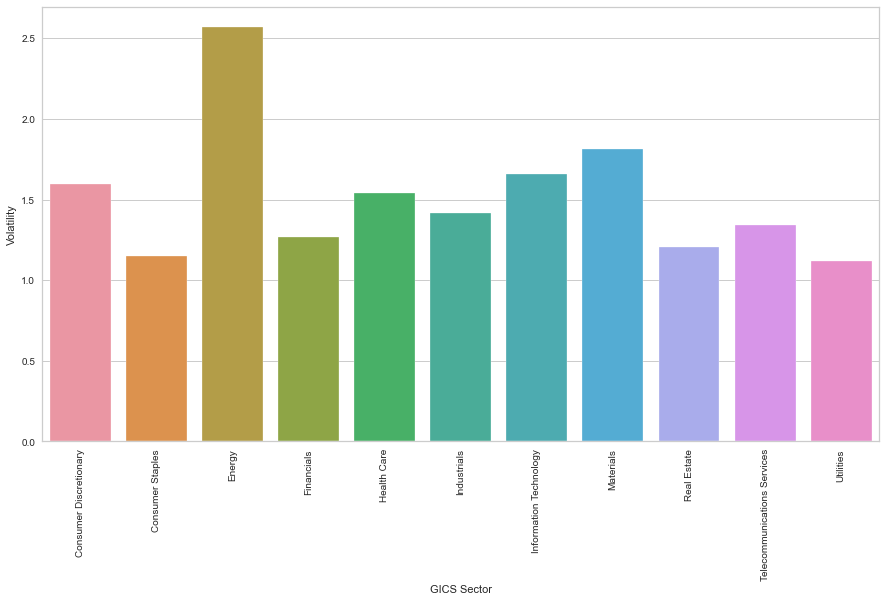

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="GICS Sector", y="Volatility", ci=False) 
plt.xticks(rotation=90)
plt.show()

### Observations
- Energy sector has the highest volatality, Utilities and Consumer Staples being the lowest.
- Materials, Information Technology, Health Care and Consumer Discretionary has moderately high Volatality. 


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**We have already observed in earlier steps that there are no duplicate values or missing values in the data. Let's check for outliers** 

### Outlier Check

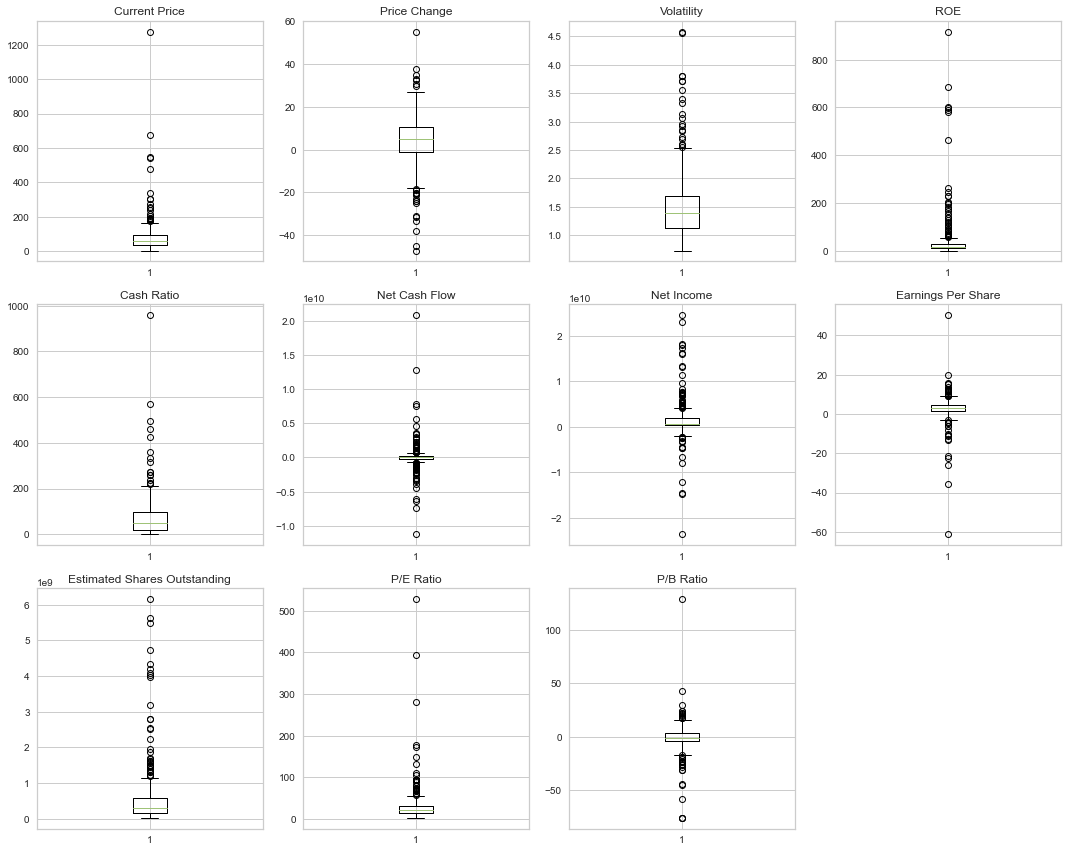

In [65]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**There are outliers in every column. We are going to leave them untreated for now as they look like valid data.** 

### Scaling

In [67]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [68]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [69]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

In [70]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


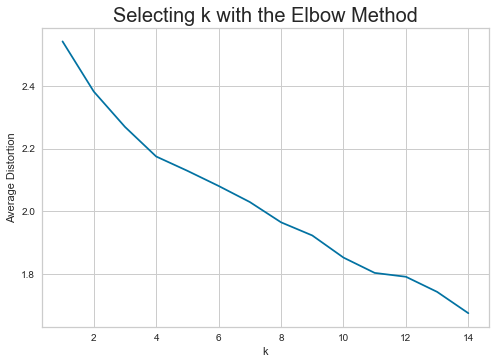

In [71]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

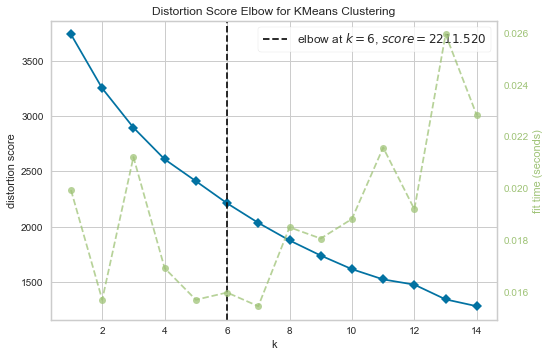

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Silhouette scores**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779403)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.40054227372136175)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.20446696215274296)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


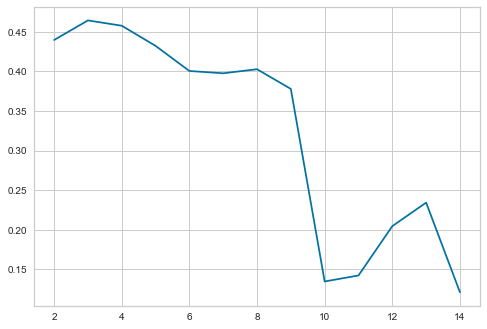

In [73]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

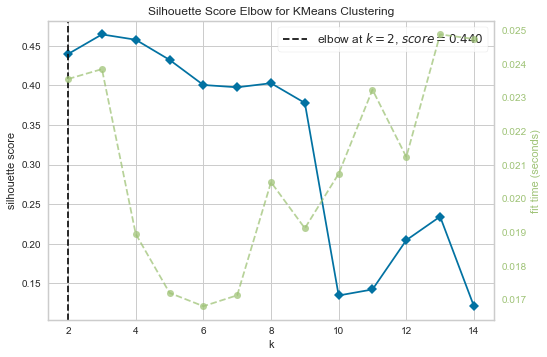

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [74]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

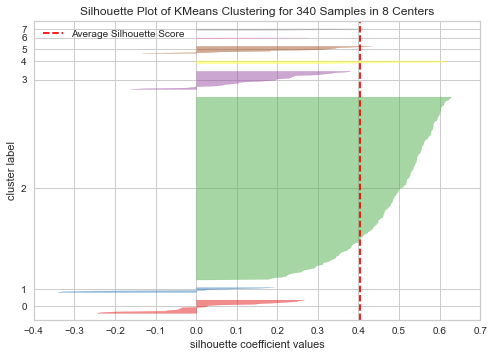

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8,random_state=1)) 
visualizer.fit(k_means_df)
visualizer.show()

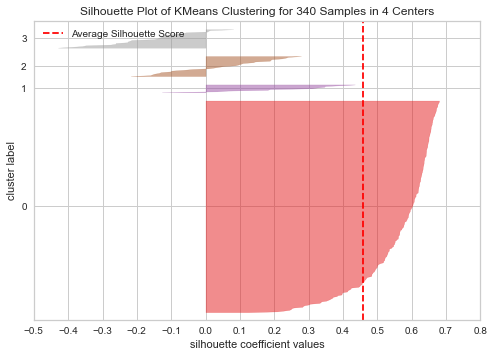

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4,random_state=1)) 
visualizer.fit(k_means_df)
visualizer.show()

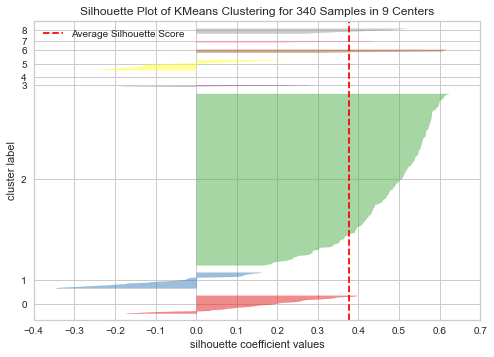

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [81]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9,random_state=1)) 
visualizer.fit(k_means_df)
visualizer.show()

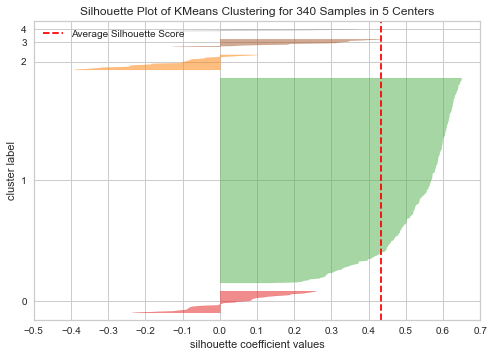

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5,random_state=1)) 
visualizer.fit(k_means_df)
visualizer.show()

**Let's take 5 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 5 in the elbow curve.**

In [83]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=0)

In [84]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [85]:
df.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,4
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,4
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,4
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,4
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,0
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831,4
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585,0
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497,4
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649,4
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912,4


In [169]:
cluster_profile_k = df.groupby("K_means_segments").mean()

In [170]:
cluster_profile_k["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Security"].count().values
)

In [171]:
# let's display cluster profiles
cluster_profile_k.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_Clusters,HC_Clusters_ward,count_in_each_segment
K_means_segments,,,,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,5.250000,0.125000,24
1,41.373681,-14.849938,2.596790,27.285714,64.457143,34462657.142857,-1293864285.714286,-2.459714,450100420.905143,61.563930,2.476202,6.000000,1.542857,35
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,5.230769,2.230769,13
3,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,4.666667,1.888889,9
4,72.768128,5.701175,1.359857,25.598456,52.216216,-913081.081081,1537660934.362934,3.719247,436114647.527683,23.473934,-3.374716,6.000000,0.988417,259


In [89]:
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 4, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 259
Categories (259, object): ['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', ..., 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']

In cluster 0, the following companies are present:
['Analog Devices, Inc.', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 24
Categories (24, object): ['Analog Devices, Inc.', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', ..., 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']

In cluster 1, the following companies are present:
['Akamai Techno

In [92]:
df.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          6
                  Consumer Staples                1
                  Energy                          0
                  Financials                      0
                  Health Care                     9
                  Industrials                     0
                  Information Technology          6
                  Materials                       0
                  Real Estate                     1
                  Telecommunications Services     1
                  Utilities                       0
1                 Consumer Discretionary          1
                  Consumer Staples                0
                  Energy                         20
                  Financials                      1
                  Health Care                     0
                  Industrials                     4
                  Information Technology          4
                  

In [172]:
cluster_profile_k[["count_in_each_segment"]]

,count_in_each_segment
K_means_segments,
0,24
1,35
2,13
3,9
4,259


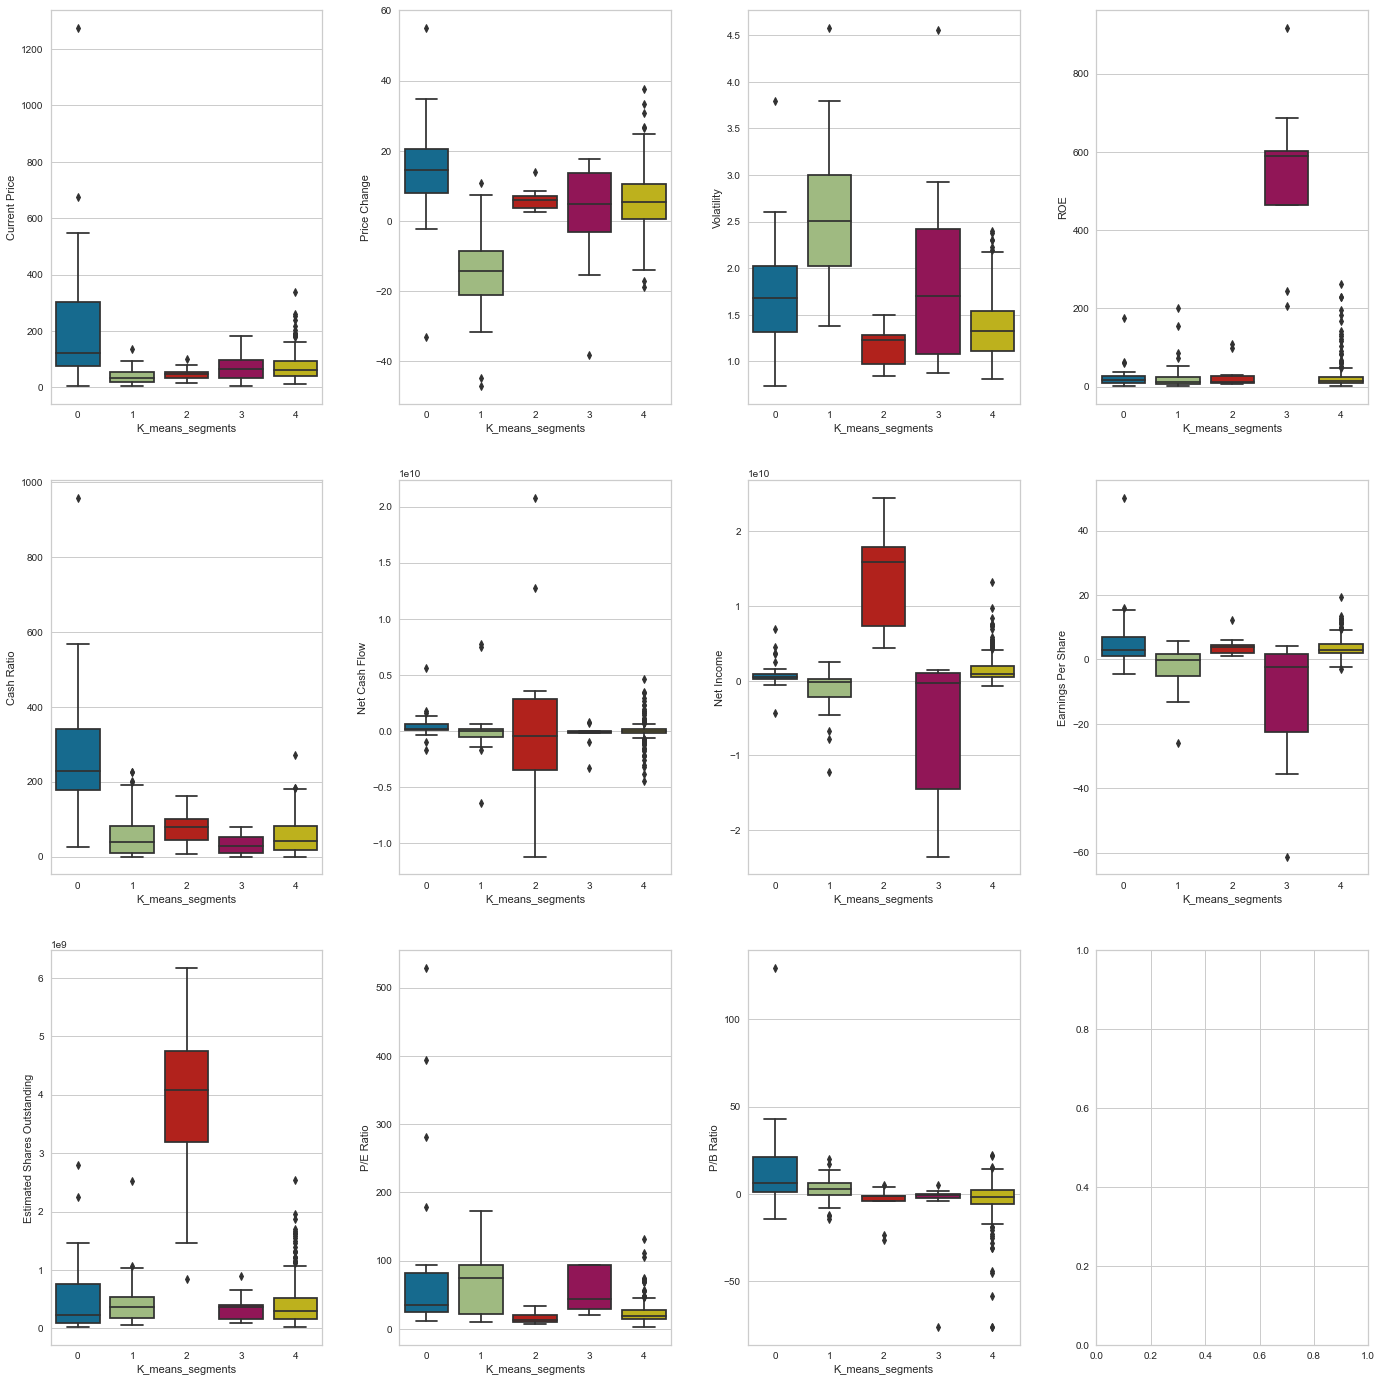

In [96]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df,
                y=df.columns[4+counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Hierarchical Clustering

In [97]:
hc_df = subset_scaled_df.copy()

In [102]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

**Let's explore different linkage methods with Euclidean distance only.**

In [103]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [104]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


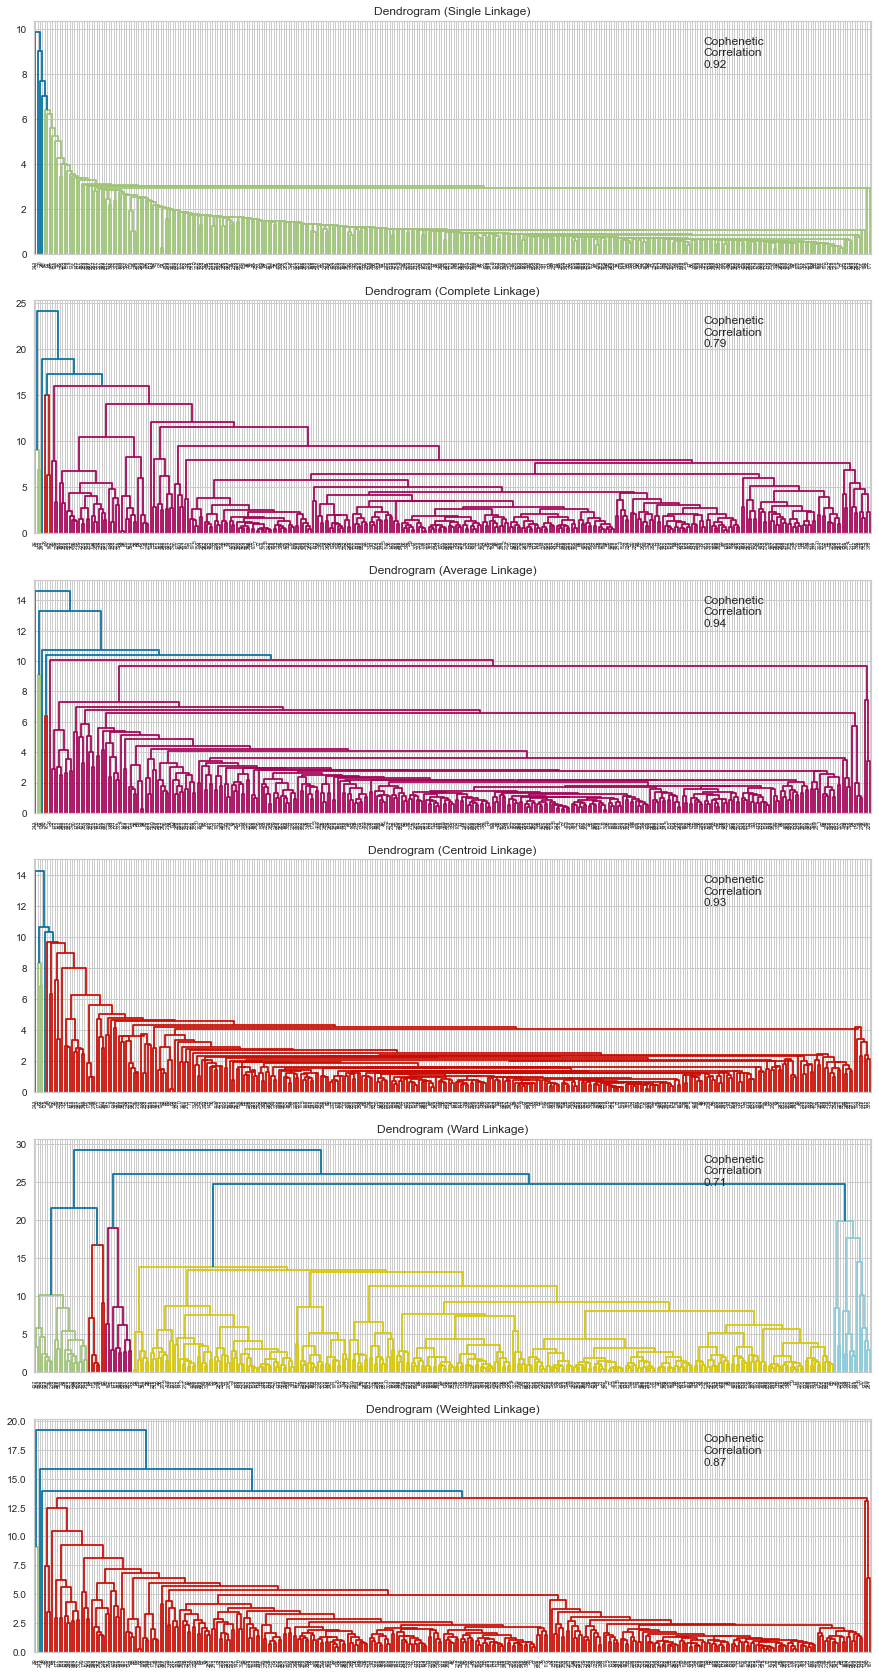

In [105]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]


# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations
- The cophenetic correlation is highest for average linkage method.
- We will move ahead with average linkage.
- 7 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [128]:
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [129]:
hc_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [130]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [131]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

In [132]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 6, the following countries are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Yahoo Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 330
Categories (330, object): ['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', ..., 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']

In cluster 5, the following countries are present:
['Alliance Data Systems']
Categories (1, object): ['Alliance Data Systems']

In cluster 2, the following countries are present:
['Alexion Pharmaceuticals', 'Amazon.com Inc', 'Netflix Inc.']
Categories (3, object): ['Alexion Pharmaceuticals', 'Amazon.com Inc', 'Netflix Inc.']

In cluster 0, the following countries are present:
['Apache Corporation', 'Chesapeake Energy']
Categories (2, object): ['Apache Corporation', 'Chesapeake Energy']

In cluster 1, the following countries are present:
['Bank of A

**We can see that there are 4 out of 7 clusters of only 1 company, 2 clusters of two companies, and all the other countries are grouped into one cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

In [157]:
HCmodel1 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel1.fit(hc_df)

AgglomerativeClustering(n_clusters=5)

In [158]:
hc_df["HC_Clusters_ward"] = HCmodel1.labels_
df["HC_Clusters_ward"] = HCmodel1.labels_

In [159]:
cluster_profile1 = df.groupby("HC_Clusters_ward").mean()

In [160]:
cluster_profile1["count_in_each_segments"] = (
    df.groupby("HC_Clusters_ward")["Security"].count().values
)

In [161]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters_ward"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df[df["HC_Clusters_ward"] == cl]["Security"].unique())
    print()

In cluster 1, the following countries are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 280
Categories (280, object): ['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Analog Devices, Inc.', ..., 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']

In cluster 0, the following countries are present:
['Adobe Systems Inc', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Applied Materials Inc', 'Amgen Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 27
Categories (27, object): ['Adobe Systems Inc', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Applied Materials Inc', ..., 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']

In cluster 4, the following countries are prese

In [173]:
df.groupby(["HC_Clusters_ward", "GICS Sector"])['Security'].count()

HC_Clusters_ward  GICS Sector                
0                 Consumer Discretionary          5
                  Consumer Staples                1
                  Energy                          0
                  Financials                      1
                  Health Care                     8
                  Industrials                     0
                  Information Technology          9
                  Materials                       1
                  Real Estate                     1
                  Telecommunications Services     1
                  Utilities                       0
1                 Consumer Discretionary         34
                  Consumer Staples               17
                  Energy                          7
                  Financials                     45
                  Health Care                    31
                  Industrials                    53
                  Information Technology         23
                  

**This clustering has slightly better variability than the earlier one.**

In [162]:
# lets display cluster profile
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,HC_Clusters,count_in_each_segments
HC_Clusters_ward,,,,,,,,,,,,,,
0,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,0.629630,4.962963,27
1,73.062443,4.673490,1.399188,34.878571,54.507143,66523982.142857,1556658764.285714,3.689625,443300430.283964,24.379506,-3.214885,3.775000,6.000000,280
2,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,1.181818,6.000000,22
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,2.000000,6.000000,9
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,3.000000,0.000000,2


In [163]:
cluster_profile1[["count_in_each_segments"]]

,count_in_each_segments
HC_Clusters_ward,
0,27
1,280
2,22
3,9
4,2


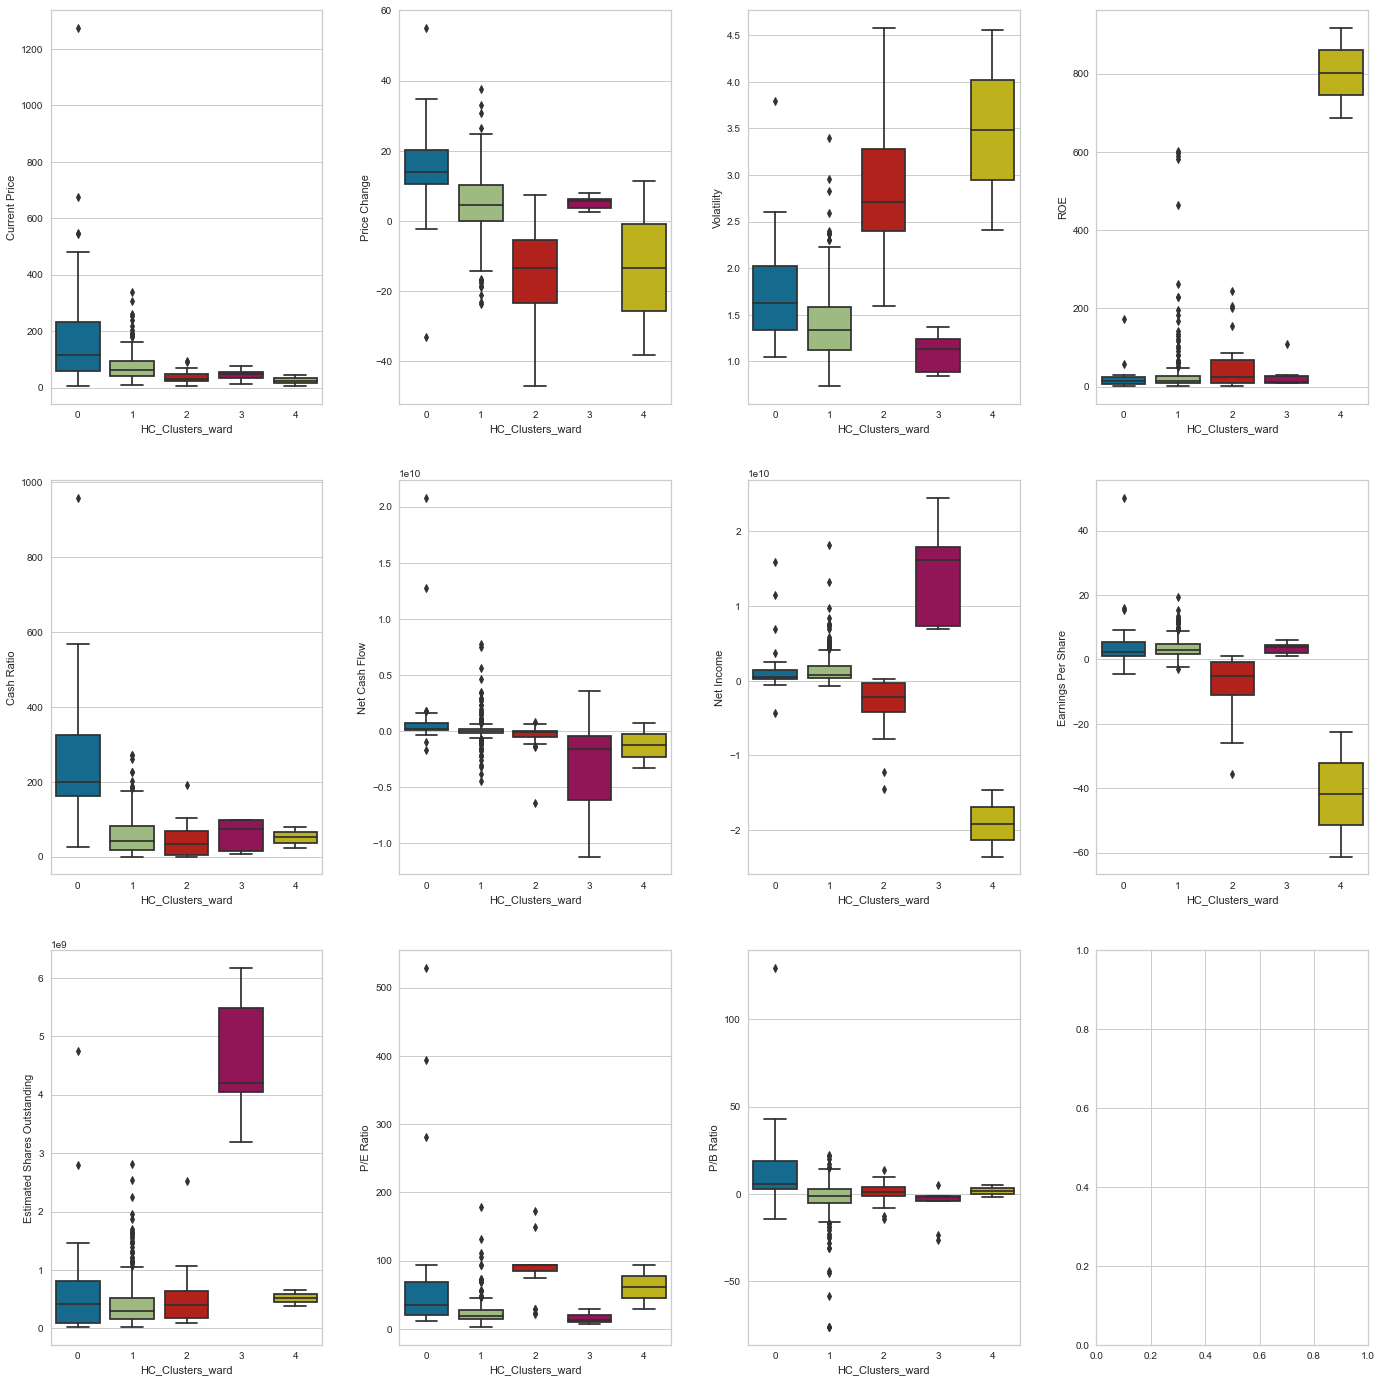

In [164]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df,
                y=df.columns[4+counter],
                x="HC_Clusters_ward",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## K-means vs Hierarchical Clustering

- The difference in `count in each segments` of both techniques is not that significant. K means clusters have slightly more variability than hierarchical clustering (with ward linkage) in this case.  In hierarchical clustering, there is one cluster with only 2 companies. 
- Both the techniques took nearly same time with regards to execution in this case.
- 5 clusters are found as appropriate in both the algorithms.Cluster 1 in Hierarchical clustering with 280 companies appears to be similar to cluster 4 in K Means Clustering with 259 companies.
- Cluster 3 has exact same number of companies in both the algorithms , but the companies are different across both clusters.

**Cluster 0**
- High Current stock price compared to other clusters
- Price has increased in last 13 weeks 
- Moderate volatality 
- High Cash ratio and Net cash flow
- Slightly low net income than cluster 3 and 1
- High Earnings per share
- Less shares outstanding
- Low price to earnings per share ratio
- High P/B ratio


**Cluster 1**
- Low Current stock price than cluster 0
- There are companies in it with both price drop and rise in last 13 weeks
- Low volatality in Hierarchical clustering but high in K means
- Low cash ratio than cluster 1 in Hierarchical clustering, but higher than cluster 1 and lower than 0 in K means
- Net cash flow almost 0
- positive net income and Earnings per share in Hierarchical clustering whereas negative net income and Earnings per share in K means for most of the companies in the cluster
- Less shares oustanding than cluster 0
- P/E ratio lower than cluster 0 in Hierarchical clustering whereas Higher than cluster 0 in K means
- Low P/B ratio than cluster 0

**Cluster 2**
- Low Current stock price.
- Price drop in Hierarchical clustering whereas price increase in K means
- High volatality in Hierarchical clustering but Low in K means
- Low cash ratio than cluster 1
- Net cash flow has a range from -0.5 to + 0.5
- negative net income and Earnings per share in Hierarchical clustering whereas positive net income and Earnings per share in K means for most of the companies in the cluster
- more shares oustanding in K means
- P/E ratio higher than cluster 0 and 1 in Hierarchical clustering whereas lower than cluster 0 and 1 in K means
- Low P/B ratio than cluster 0


**Cluster 3**
- Low Current stock price in HC but moderate price in K means
- Price increase in last 13 weeks
- Low volatality in Hierarchical clustering but high in K means
- Low cash ratio 
- Net cash flow has a range from -1.0 to 0.5 in K means, but negative in HC
- Positive net income and Earnings per share in Hierarchical clustering whereas high negative net income and Earnings per share in K means for most of the companies in the cluster
- more shares oustanding in HC, less in K means
- P/E ratio low than cluster 0 and 1 in Hierarchical clustering whereas High than cluster 0 and 1 in K means
- Low P/B ratio 

**Cluster 4**
- Low Current stock price in HC but moderate price in K means
- Price drop in HC whereas increase in K means in last 13 weeks
- High volatality in Hierarchical clustering but very low in K means
- Low cash ratio in HC, moderate in K means
- Negative net cash flow in HC, but has a range from -5.0 to 0.5 in K means
- Negative net income and Earnings per share in Hierarchical clustering whereas positive negative net income and Earnings per share in K means for most of the companies in the cluster
- Less shares oustanding in HC, less in K means
- Moderate P/E ratio in HC, low in K means
- Low P/B ratio 

## Actionable Insights and Recommendations

- Companies in Cluster 0 appears reasonably good for investment. The volatality is moderate. The price change in last 13 weeks has been upward only. The current prices are higher than other clusters. Hence the risk of loss is less. 
- Cluster 1 of HC and Cluster 4 in K means are a mixed bag, since most of the companies are in it. Investors might  need to assess individual company's performance for a longer period before investing. 
- We've seen from EDA that Healthcare has seen maximum price increase in last 13 weeks, which makes this sector lucrative for short term investments. Energy stock prices have dropped the most. The could be good for long term investment.
- HC Cluster 3 companies are also safe for investment since although current price is low, the price change has been positive only, however minimum. The volatality is also low which indicates it's a low risk profile. It has positive Net Income and Earnings per Share. It seems profitable for long term investment. Same is K means Cluster 2
- HC Cluster 4 is a high risk profile. The prices have only dropped in last 13 weeks. The volatality is quite high and Net income and Earnings per share have been very low. K Means Cluster 1 is also similar. 